# **STINTSY Machine Learning Project**

## Members ##

CAASI, Samantha Nicole L. 

GUTIERREZ, Carlos Kristoffer

MARCELLANA, John Patrick T.

MURIEL, Gabriel I.

## **I. Overview**

### **Problem Statement**
 The dataset's **primary goal** is to understand and predict productivity performance by focusing on the output of teams involved in the garments manufacturing industry. Given the labor-intensive nature of the garment manufacturing industry and the numerous productivity factors that affect it, this dataset is useful for examining these aspects and forecasting productivity results.

### **Target Task**
  Since `actual_productivity`, the main feature of interest, is a continuous variable with a range of 0 to 1, a regression task would be suitable in this case, where we predict the `actual_productivity`.


## **II. Description of the dataset**



#### **Dataset Description**
The garment manufacturing industry gathers the garment dataset to assess teams' productivity. It records precise time data on day-to-day operations, team structures, and production rates. The manually compiled information, which industry professionals have verified, is intended to support productivity monitoring, analysis, and forecasting in the apparel manufacturing sector.

#### **Data Collection Process**
The dataset was **gathered by hand** and verified by professionals in the field. Although manual data collection suggests high dependability, it may also add biases or human error, which could affect the conclusions' precision and generalizability.

#### **Dataset Structure**
**Rows**: Every row represents a productivity instance for a particular team that manufactures garments on a certain day.
**Columns**: The dataset contains 15 columns, representing different attributes related to productivity.

#### **Dataset Composition**
**Number of Instances**: 1,197 observations.
**Number of Features**: 15 features in total, each capturing an aspect relevant to garment manufacturing productivity.

#### **Feature Descriptions**
* **date**: Date of the recorded instance in MM-DD-YYYY format.
* **quarter**: Month divided into four quarters.
* **department**: Department associated with the instance, either sewing or finishing.
* **day**: Day of the week for the recorded instance.
* **team**: Team number associated with the observation.
* **targeted_productivity:** Targeted productivity level set by authorities for each team per day.
* **smv (Standard Minute Value)**: Time allocated for specific tasks.
* **wip (Work in Progress)**: Count of unfinished items; has missing values.
* **over_time:** Overtime (in minutes) recorded for each team.
* **incentive**: Financial incentives provided to motivate productivity.
* **idle_time**: Time during which production was interrupted.
* **idle_men**: Number of workers idle due to interruptions.
* **no_of_style_change**: Count of style changes for the products.
* **no_of_workers**: Total workers in each team.
* **actual_productivity**: Actual productivity achieved, which ranges from 0 to slightly over 1.

## **III. List of Requirements**
List all the Python libraries and modules that you used.
* pandas
* sklearn
* numpy as np
* matplotlib
* seaborn

## **IV. Data preprocessing and cleaning**


### **Imports**

In [377]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset** <br>


We will load the dataset using `pandas`

In [378]:
data = pd.read_csv('./garments.csv')

### **Overview of the Dataset** <br>


Let's examine sample values from each column to better understand the dataset. 

In [379]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


From the output above, the dataset contains a total of **13** features: **4** categorical features (`quarter`, `department`, `day`, and `team`) and **9** continuous features (`targeted_productivity`, `smv`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change`, and `no_of_workers`)

We can gain a better understanding of our dataset by reviewing general information about each column, including data types, non-null counts, and the presence of any missing values

In [380]:
print("\nDataset Information:")
display(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nu

None

The dataset contains a total of **1,197** instances, with only one feature, `wip`, having missing values

### **Dropping of `date` feature**


As a first pre-processing step, we need to determine which features should we use in determining the actual_productivity of an instnace. Since the `quarter` and `day` columns already capture essential temporal features, hence, we will drop the `date` column. The `quarter` represents the broader time frame for each month while `day` provides granular weekly patterns. The `date` represent specific dates that might introduce noise or overfit the models to patterns rather than generalize trends

In [381]:
data = data.drop('date', axis=1)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### **Checking for missing values** <br>


Earlier, we identified `wip` as the only feature with missing values. Let's validate this observation to confirm if it truly is the only one.

In [382]:
print("\nMissing Values in Each Column:")
display(data.isnull().sum())


Missing Values in Each Column:


quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Since the `wip` variable has missing values and amounting to almost half the dataset, we will fill the missing rows

Let's first visualize the distribution of the `wip` feature. If the distribution is normal, we can fill the missing rows with the mean. If the distribution is skewed, we can fill it with the median of the column.

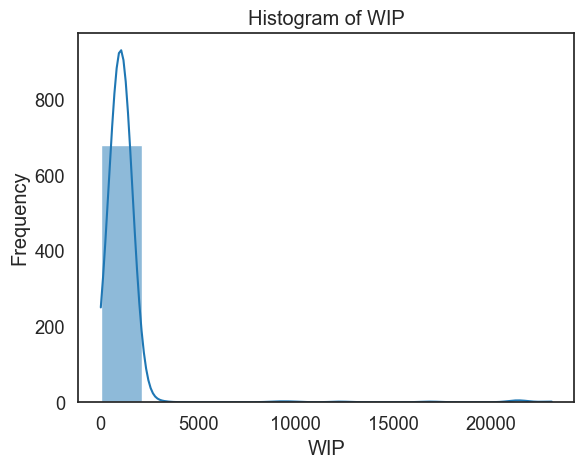

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['wip'], kde=True, bins=11)  
plt.title('Histogram of WIP')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.show()


Given the skewness of the data, the median could be a suitable choice for filling missing values. However, in this dataset, `wip` represents 'work in progress,' and a missing value might indicate no unfinished work for that specific instance. Therefore, it would be more appropriate to fill the missing values with **0** instead.

In [384]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
data['wip'] = imputer.fit_transform(data[['wip']])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Checking for duplicate instances in our dataset**

We need to ensure that there are no redundant entries that could bias your analysis or model results. Let's check if we have any duplicates in our data and display these rows.

In [385]:
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
    print("\nDuplicate Rows:")
    display(data[duplicate_rows])


Number of duplicate rows: 0


Since there are no duplicate data, we don't need to do anything for it

### **Handling Data Inconsistencies**

In [386]:
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In the `department` column, our data is supposed to have either **sewing** or **finishing** only. However, the 'sewing' value has incorrect spelling, and there is an extra space in some 'finishing' values. Therefore, we need to handle them.

In [387]:
data['department'] = data['department'].replace('sweing', 'sewing')
data['department'] = data['department'].replace('finishing ', 'finishing')

# Display unique values to verify the change
print("Unique values in 'department' column after correction:")
print(data['department'].unique())

Unique values in 'department' column after correction:
['sewing' 'finishing']


### **Label Encoding**

Let's use `sklearn.preprocessing.LabelEncoder` to encode our labels of some of our features such as **quarter**, and **department**

Instantiate a LabelEncoder object.

In [388]:
label_encoder = sklearn.preprocessing.LabelEncoder()

Fit the `quarter` feature by calling the `fit()` function of the object.

In [389]:
label_encoder.fit(data['quarter'])

LabelEncoder()

Display the classes.

In [390]:
label_encoder.classes_

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Thus, labels will be transformed from string values to their corresponding integer values:
- `Quarter 1` - `0`
- `Quarter 2` - `1`
- `Quarter 3` - `2`
- `Quarter 4` - `3`
- `Quarter 5` - `4`

Transform the `quarter` feature by calling the `transform()` function of the object.


In [391]:
data['quarter'] = label_encoder.transform(data['quarter'])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


Let's do the same for the `department`feature

The `department` labels will be transformed from string values to their corresponding integer values:

- `finishing` - `0`
- `sewing` - `1`

In [392]:
label_encoder.fit(data['department'])
data['department'] = label_encoder.transform(data['department'])
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Ordinal Encoding**

To transform our feature `day` to numerical features, we will use ordinal encoding. We can create a dictionary that will map string values in the `day` feature to its corresponding integer value according to some order

- `Sunday` - `0`
- `Monday` - `1`
- `Tuesday` - `2`
- `Wednesday` - `3`
- `Thursday` - `4`
- `Friday` - `5`
- `Saturday` - `6`
- `Sunday` - `7`

In [393]:
data_day_dict = {
  'Sunday': 0,
  'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7
}

We will use the `map()` function to transform the `day` feature to its correspomding ordinal value

In [394]:
data['day'] = data['day'].map(data_day_dict)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,4,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,3,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,3,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,3,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Changing of Data Types**


The `no_of_workers` column should contain whole numbers, as it represents a count of workers, and workers cannot be fractional. Therefore, we need to change its data type to integer.

Our approach is to truncate the decimal points to minimize the impact on the data, as rounding up could artificially inflate the worker count.

In [395]:
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

# Verify the change
print(data['no_of_workers'].head())
print("Data type after flooring:", data['no_of_workers'].dtype)


0    59
1     8
2    30
3    30
4    56
Name: no_of_workers, dtype: int64
Data type after flooring: int64


## **V. Exploratory Data Analysis**

This exploratory data analysis investigates the factors influencing the `actual_productivity` in the garments industry, examining relationships between productivity and variables such as team performance, work schedules, incentives, and operational disruptions, to uncover patterns and insights that drive productivity outcomes.

### What is the distribution of `actual_productivity`?

Let's get a visualization first of the distribution of our target variable. This will help identify if the distribution is skewed or normally distributed. Understanding the distribution of the target variable helps identify potential issues like skewness or imbalanced data.

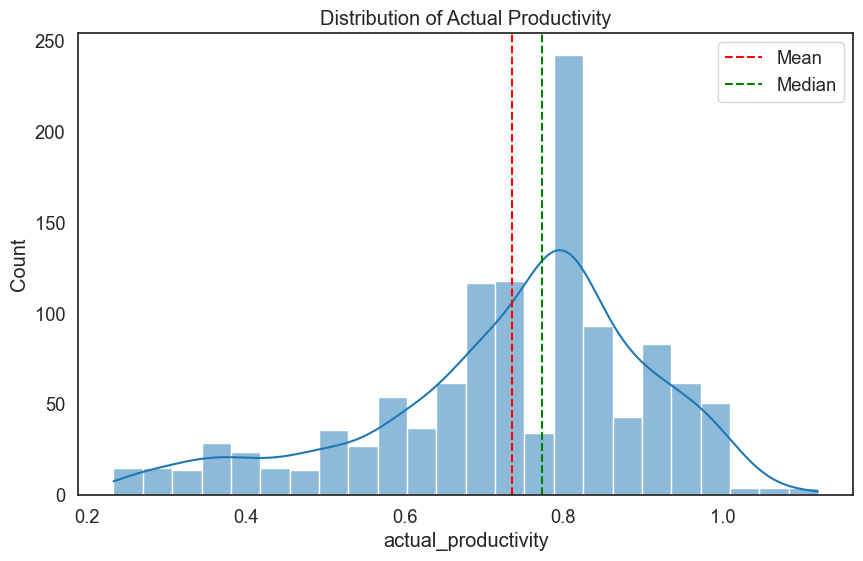

In [396]:
# Plot the distribution of actual_productivity
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_productivity'], kde=True)
plt.title('Distribution of Actual Productivity')
plt.axvline(data['actual_productivity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['actual_productivity'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

1. Distribution of Actual Productivity:
- Most teams operate at around 80% productivity (highest peak with 240 cases)
- Second most common is 65-70% productivity (about 120 cases)
- Very few teams achieve above 95% or below 40% productivity
- Average (mean) productivity is 75%
- Middle value (median) productivity is 80%

2. Findings:
- Normal Performance: 80% productivity is typical
- Room for Improvement: Many teams at 65-70% could potentially improve to 80%
- Exceptional Cases: Few teams reach over 90% productivity
- Poor Performance: Rare cases below 40% productivity need investigation

3. Recommendations:
- Use 80% as a realistic target for teams
- Focus on moving teams from 65-70% up to 80%
- Study what makes some teams achieve over 90%
- Investigate why some teams fall below 40%


### What is the distribution of the feature `quarter`?

To gain a clearer understanding of our categorical variables, let's explore the distribution of each, starting with `quarter`. This will help us determine if there are equal instances for each quarter of the month.

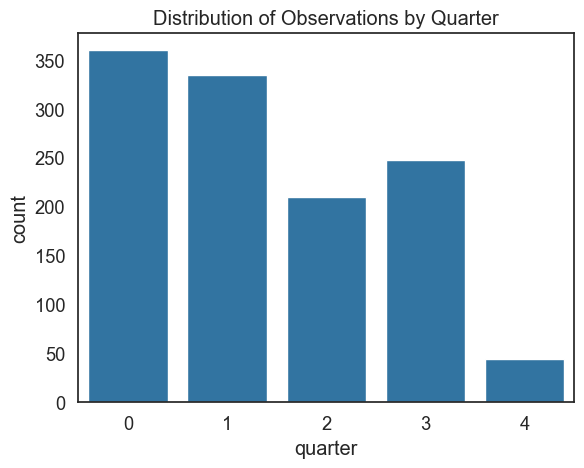

In [397]:
sns.countplot(data=data, x='quarter')
plt.title("Distribution of Observations by Quarter")
plt.show()

The visualization reveals that the majority of instances are concentrated in Quarter 1 and Quarter 2 of the month, indicating that most data points are from the first half of the month.

### What is the distribution of the feature `day`

Now, let's visualize the distribution of the feature `day` as this will help us determine if the number of instances in each day are equally distributed or some days of the week have more data.

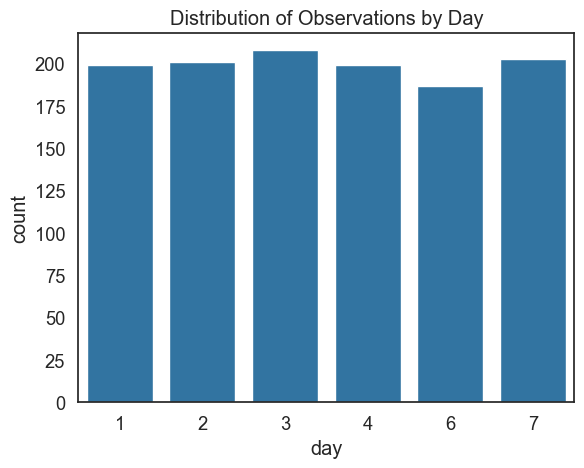

In [398]:
sns.countplot(data=data, x='day')
plt.title("Distribution of Observations by Day")
plt.show()

Using a numerical representation where 1 corresponds to **Sunday** and 7 corresponds to **Saturday**, this visualization illustrates that the distribution of instances is nearly uniform across the days of the week. However, there is a notable exception for **Fridays**, which show no recorded instances.

### What is the distribution of the feature `department`

Let's also visualize the distribution of the feature `department`. This will help us determine if one department has more instances than the other

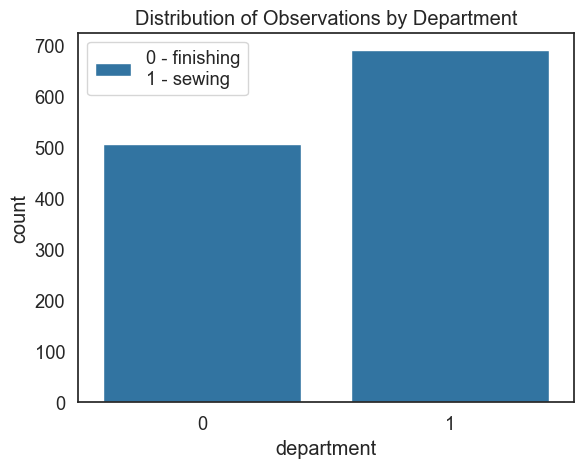

In [399]:
sns.countplot(data=data, x='department')
plt.title("Distribution of Observations by Department")
plt.legend(["0 - finishing""\n1 - sewing"])
plt.show()

Based on the chart above, it indicates that there are significantly more instances in the `sewing` department compared to the `finishing` department.

### What are the distribution of the numerical features?

Determining the distribution of our numerical features will help us better understand our data and will help us determine if the features have skewed distributions that may require normalization in order to enhance the performance of models later on

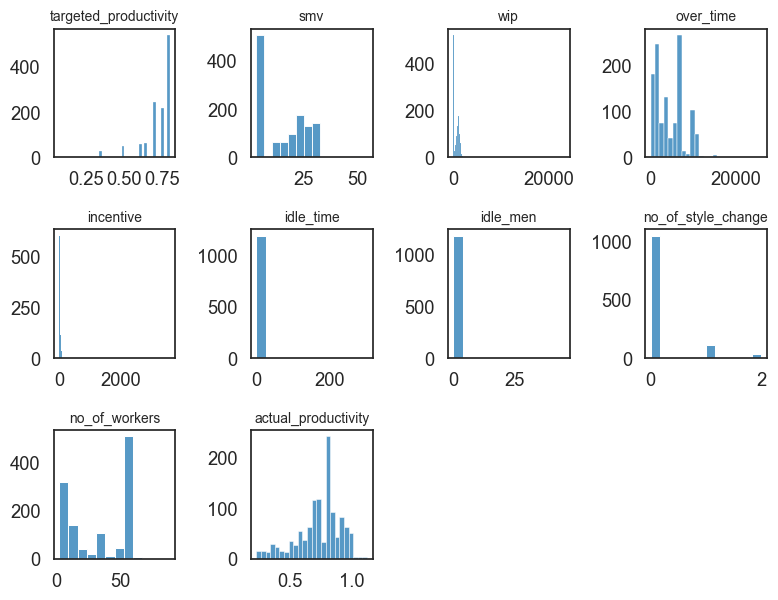

In [400]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.histplot(x=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Most of our features have a skewed distribution, with the majority of their values close to **0**. Some features contain visible outliers that should be addressed to prevent them from negatively impacting the performance of the models.

Let's further discuss some relevant patterns in each of these distributions.

#### Distribution of SMV (Standard Minute Value)

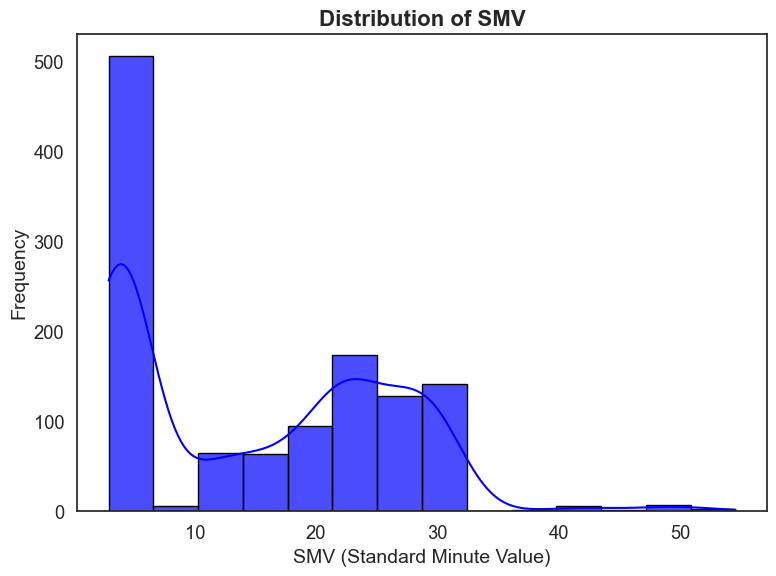

In [401]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='smv', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of SMV", fontsize=16, fontweight='bold')
plt.xlabel("SMV (Standard Minute Value)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**SMV (Standard Minute Value)** This feature is the allocated time it takes to finish a task. The lower bound indicates a higher frequency value indicating that in most days, allocated time for a task takes short amount of time. However, we can observe that there is a huge drop in frequency for days that tasks takes around 20 minutes to accomplish. Lastly, there are very few tasks that takes more than 40 minutes to accomplish. Based on this data, some insights can be inferred. A shorter task for a given day indicates that a task is simple while for outliers such as higher allocation time indicates a more complex task. With these observations, we can leverage the values of SMV especially in the higher range of values to understand its impact on the actual productivity. 

#### Distribution of Overtime (OT)

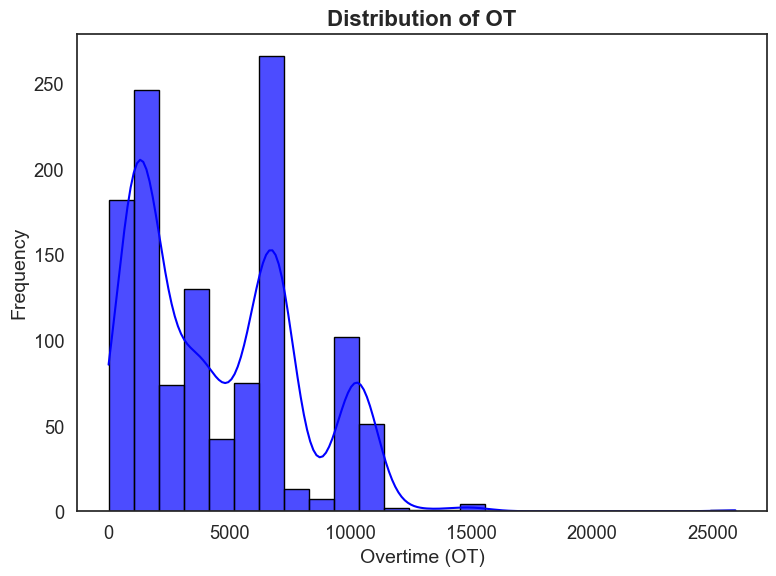

In [402]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='over_time', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of OT", fontsize=16, fontweight='bold')
plt.xlabel("Overtime (OT)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**Over Time (OT)**. Extreme outliers can be observed such as instances where OT went over 20000 minutes. We also observed that the values are concentrated from the lower values. If we are to represent this as the number of overtime in minutes for a given day, then these outliers and frequent data points might represent unrealistic values. Misinterpretations of data might be possible because of how this feature integrated into the dataset such as one instance or a day might represent more than a day. Nevertheless, having excessive overtime means that the teams may have overworked a few times. To integrate this with our model, proper scaling techniques should be observed and in this case where values are large, we need to scale it down to make it more realistic. 

#### Distribution of Number of Workers 

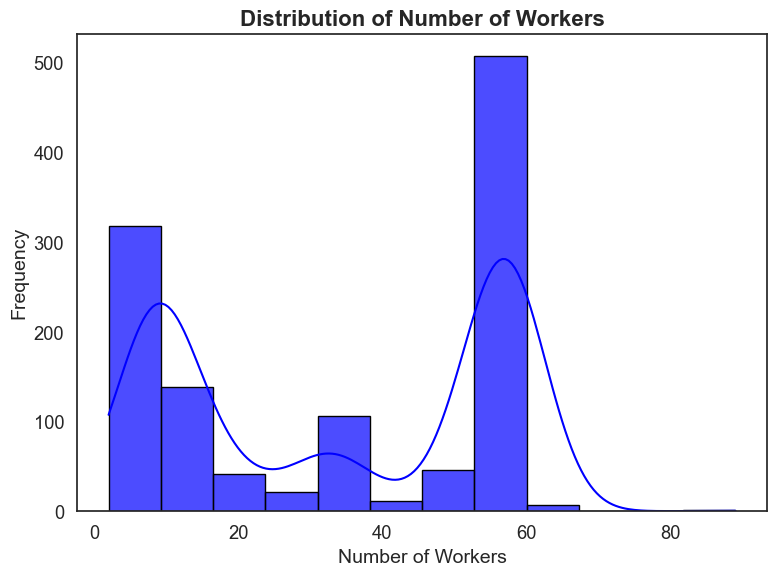

In [403]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='no_of_workers', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of Number of Workers", fontsize=16, fontweight='bold')
plt.xlabel("Number of Workers", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**Number of Workers.** The frequency distribution of this feature shows that most instances have more than 50 workers in their team. In the lower range that represents smaller workers, we can also observe a frequent pattern. On the opposite observation where instances have low frequency, these resides in the middle. An initial observation here is that larger teams are most common in the industry workflow. As for determining its relevance to the target variable, we will be further analyzing the correlation between the allocated time to the number of workers.

#### Distribution of WIP

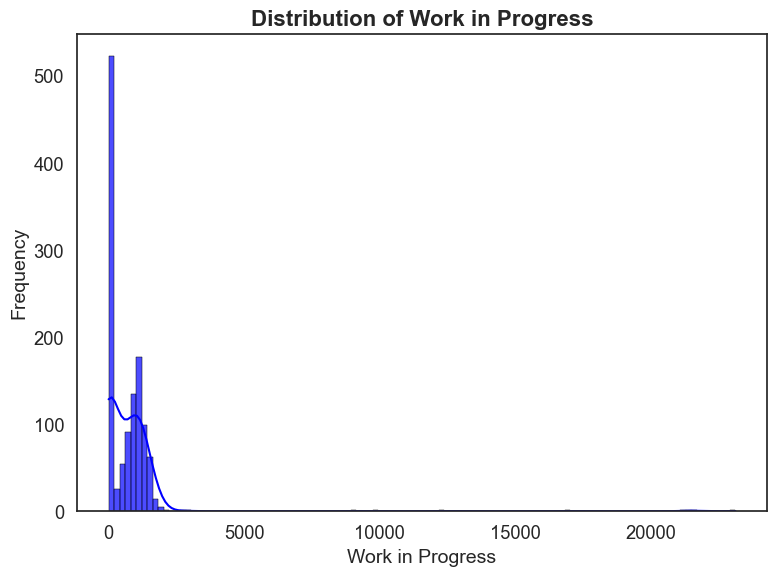

In [404]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='wip', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of Work in Progress", fontsize=16, fontweight='bold')
plt.xlabel("Work in Progress", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**WIP (Work in Progress)**. This feature shows how many unfinished items for a given day. Earlier, we performed a preprocessing of data that changed a null value from zero to indicate that there is no unfinished items for that day. We can observe that these zeroes are frequent as well in the distribution which shows that most of the days, no pending unfinished items are listed. 

### How are the features correlated with `actual_productivity`?

To highlight which features have strong relationships with the target variable, let's plot a heatmap showing the correlation of the `actual_productivity` with each feature. This helps prioritize features for model building and decide on potential feature interactions to explore further.

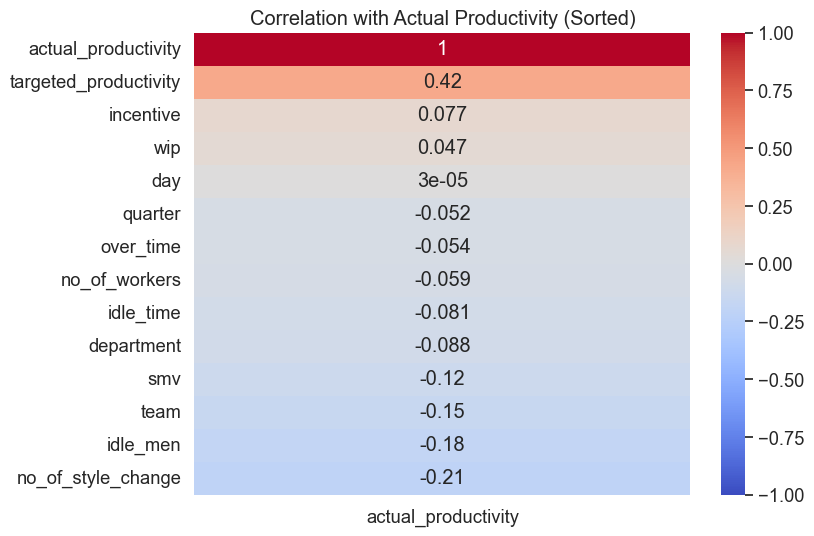

In [405]:
correlation_matrix = data.corr()
actual_productivity_corr = correlation_matrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(actual_productivity_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', cbar=True)
plt.title("Correlation with Actual Productivity (Sorted)")
plt.show()

The heatmap illustrates the correlation between various `features` and `actual_productivity`, highlighting key relationships within the dataset. Among all features, `targeted_productivity` shows the strongest positive correlation (0.42) with `actual_productivity`, indicating that higher targets are often associated with higher achieved productivity. 

Weak positive correlations are observed for `incentive` (0.077) and `wip` (0.047), suggesting minimal contributions to productivity. Conversely, features like `idle_men` (-0.18), `team` (-0.15), `idle_time` (-0.081), and `no_of_style_change` (-0.21) exhibit negative correlations, implying that inefficiencies, such as idle workers or frequent style changes, reduce productivity. Features like `quarter`, `day`, and `over_time` have near-zero correlations, indicating limited impact on productivity. 

### How does actual_productivity vary by `department` and `team`?

We'll explore how does each department and team relate to actual_productivty. Exploring group-based variations helps reveal systemic differences or patterns in productivity tied to specific teams or departments. 

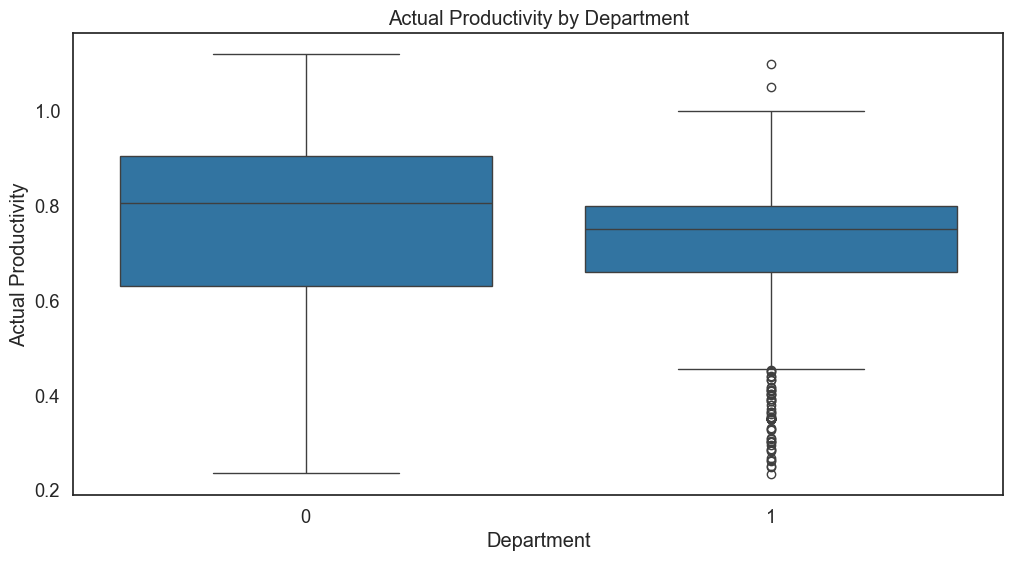

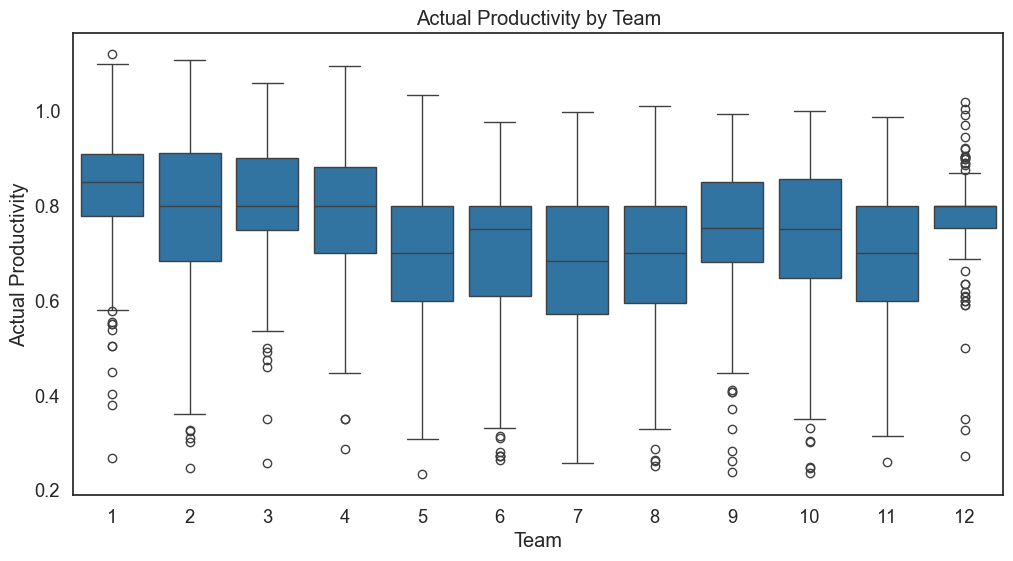

In [406]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='actual_productivity', data=data)
plt.title('Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='actual_productivity', data=data)
plt.title('Actual Productivity by Team')
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.show()


**Actual Productivity by Department**: The boxplot compares the `actual_productivity` of the Finishing department (0) and the Sewing department (1). The Finishing department demonstrates higher median productivity with a more consistent performance, as indicated by its narrower interquartile range and fewer outliers. In contrast, the Sewing department exhibits lower median productivity and greater variability, with numerous outliers at the lower end reflecting instances of significantly reduced performance. While the Sewing department has a broader range of productivity, the presence of these outliers suggests operational inefficiencies or challenges impacting consistency. 

**Actual Productivity by Team**: This boxplot illustrates the actual productivity levels for different teams (1 through 12). The median productivity across teams shows some variability, with several teams achieving relatively high medians (e.g., Teams 1, 2, and 12), while others display lower medians (e.g., Teams 8 and 10). Teams 1 and 12, in particular, exhibit consistent performance, as indicated by their relatively narrow interquartile ranges (IQRs), while other teams, such as 2, 6, and 11, show wider IQRs, suggesting greater variability in performance. Outliers are present for most teams, primarily at the lower end of productivity, indicating instances of significantly reduced performance. Teams 6, 8, and 10 have a particularly notable number of outliers, which may highlight operational challenges or inconsistencies in these teams. Overall, while some teams show stable and high performance, others face variability and performance dips that warrant further investigation to identify and address potential inefficiencies.

###  How do numerical features (e.g., `smv`, `over_time`, `incentive`, etc.) relate to `actual_productivity?

Let's examine how does these features relate to our target_variable. Our heatmap earlire shows little to no correlation with it, and examining the correlation of each might help us understand it better.

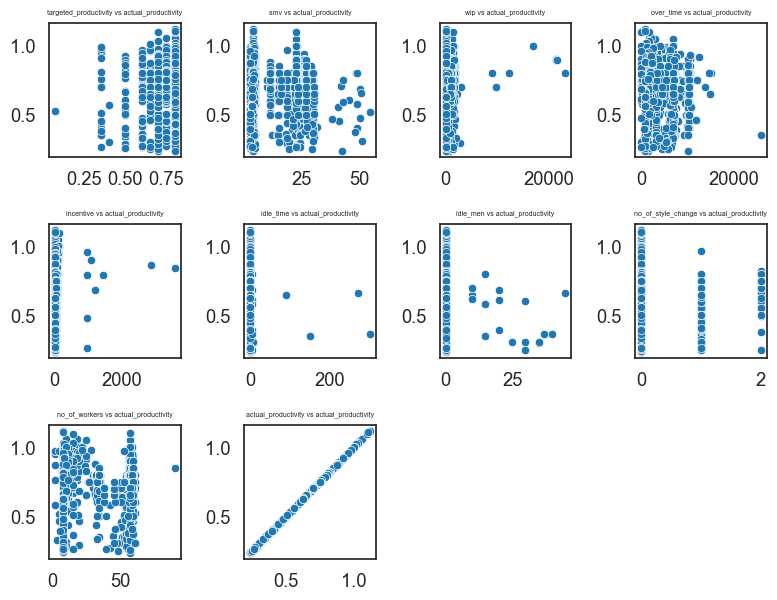

In [407]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.scatterplot(data=data, x=col, y='actual_productivity')
    plt.title(f"{col} vs actual_productivity", fontsize=5)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()


These scatter plots visualize the relationship between actual_productivity and various features in the dataset. Each chart highlights how individual features correlate with productivity, revealing several key patterns.

- `targeted_productivity` vs `actual_productivity`: There is a noticeable positive trend, indicating that higher targeted productivity is often associated with higher actual productivity, though the spread suggests variability.

- `smv` (Standard Minute Value) vs `actual_productivity`: The data shows a broad distribution with no clear trend, suggesting a weak correlation between SMV and actual productivity.

- `wip` (Work in Progress) vs `actual_productivity`: The points are concentrated near low wip values, with no clear relationship evident.

- `over_time` vs `actual_productivity`: A wide spread of points across all ranges of productivity indicates that overtime does not have a strong or consistent relationship with productivity.

- `incentive` vs `actual_productivity`: Most points cluster around lower incentive values, with no obvious trend connecting incentives to productivity.

- `idle_time` vs `actual_productivity`: The scatter suggests a negative relationship; higher idle times tend to align with lower productivity, though most points cluster at low idle times.

- `idle_men` vs `actual_productivity`: Similar to idle_time, higher numbers of idle workers seem to correspond with reduced productivity, but most data points are concentrated at lower values of idle men.

- `no_of_style_change` vs `actual_productivity`: The discrete nature of this feature shows distinct clusters, but there is no strong correlation visible with productivity.

- `no_of_workers` vs `actual_productivity`: A wide spread of points suggests no clear relationship between the number of workers and actual productivity, although most data points are concentrated around lower worker counts.

- `actual_productivity` vs itself: This plot serves as a reference and naturally forms a perfect linear relationship, as expected.

### What are the temporal trends in `actual_productivity`?

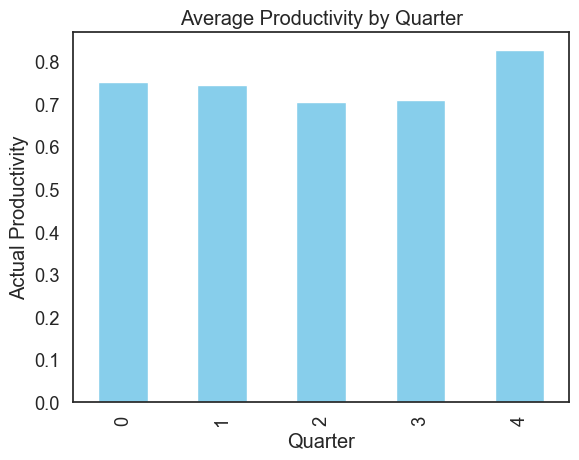

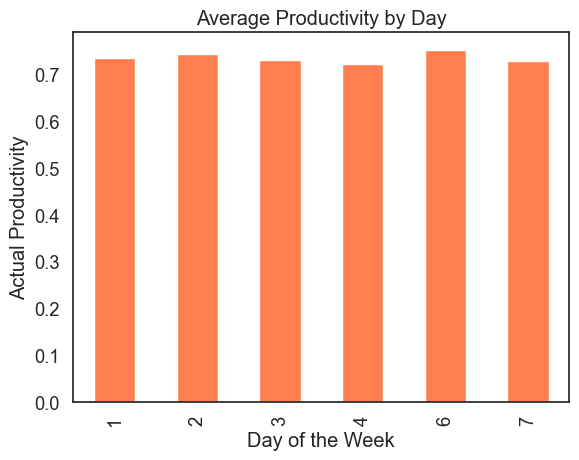

In [408]:
# Productivity by quarter
quarterly_avg = data.groupby('quarter')['actual_productivity'].mean()
quarterly_avg.plot(kind='bar', color='skyblue', title='Average Productivity by Quarter', ylabel='Actual Productivity', xlabel='Quarter')
plt.show()

# Productivity by day of the week
day_avg = data.groupby('day')['actual_productivity'].mean()
day_avg.plot(kind='bar', color='coral', title='Average Productivity by Day', ylabel='Actual Productivity', xlabel='Day of the Week')
plt.show()


The first graph shows that most teams tend to be more productive during the last quarter of the month. This pattern could be influenced by several factors, such as the proximity to payday, which may motivate employees to perform at a higher level. Additionally, it is observed that productivity is lowest around the middle of the month, suggesting that this period may experience a natural dip in performance.

The second graph reveals that productivity is relatively consistent across the days of the week, with Saturday (Day 6) being the most productive day. On the other hand, Thursday (Day 4) shows the least productivity, though the difference between these days is minimal. This suggests that, while there are slight fluctuations, overall productivity does not vary significantly by day of the week.

### What is the impact of `incentive` and `over_time` on `actual_productivity`?

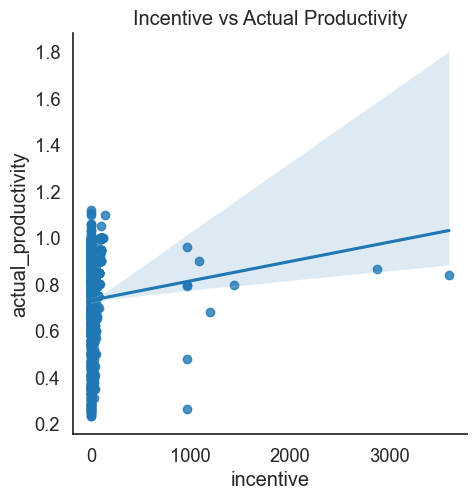

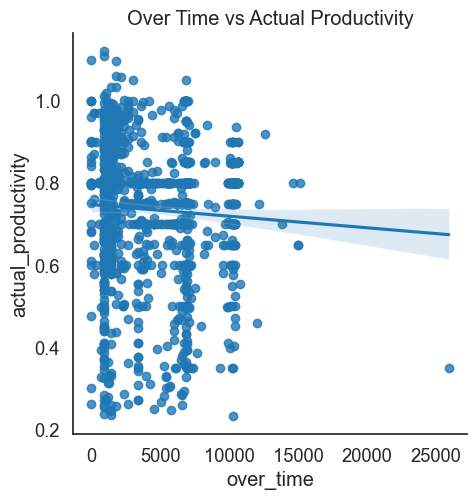

In [409]:
sns.lmplot(x='incentive', y='actual_productivity', data=data)
plt.title('Incentive vs Actual Productivity')
plt.show()

sns.lmplot(x='over_time', y='actual_productivity', data=data)
plt.title('Over Time vs Actual Productivity')
plt.show()

EXPLANATION HERE

### Are there any outliers in numerical features?

Let's visualize the box plot for each numerical features to understand and identify possible outliers. 

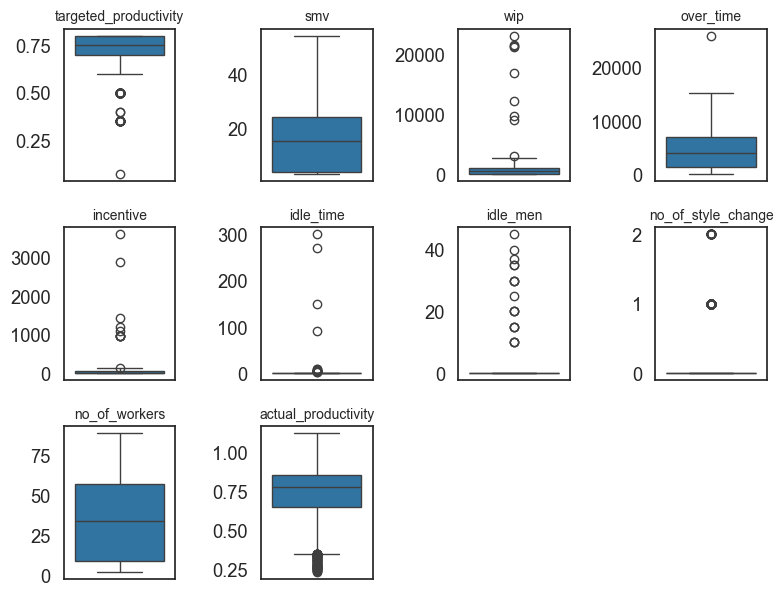

In [410]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.boxplot(y=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Each of the box plots shows the distribution of numerical features by capturing the minimum value, first quartile (Q1), median, third quartile (Q3), and the maximum value. We used box plots to identify variability and potential outliers in the dataset. In determining the outliers, the interquartile range (IQR) is important in defining the distribution of Q1 and Q3 combined. The outliers are determined by the circles in the box plot, which represent data points that fall outside 1.5 times the IQR.

The `targeted_productivity` feature shows its outliers predominantly at the lower value range. 50% of the data points are clustered at higher values, indicating skewness towards higher productivity scores. In contrast, we can also observe that the range of values for the actual productivity has higher similarities to the targeted productivity, suggesting most of the targeted productivity was achieved on different days.

Nonetheless, we can also observe that both features contain outliers, and they reside in the lower range. However, some outliers in the actual productivity are concentrated between the 0.2 and 0.4 range, reflecting slight deviations from the estimated values.

The `incentive`, `idle_time`, `idle_men`, and `no_of_style_change` are the numerical features that mainly consist of zero values. This indicates that these variables are sparse, as the majority of the data points are zero. Therefore, non-zero values are treated as outliers, as only a few of the data points contain non-zero values. In the `over_time` feature, although it has an outlier, it contains only a single outlier, suggesting an unusual deviation from the more frequent data points.

On the other hand, the `smv`, `wip`, and `no_of_workers` features exhibit no outliers, indicating that the distribution of these data points follows a predictable behavior.

Lastly, there is also an observation in the data points of `no_of_style_change`, where outliers take only two distinct values: 1.0 and 2.0. This limited range suggests that this feature may be better represented as a categorical variable rather than continuous values.

### Sparsed Features

Let's examine the sparsed features and their relevance to the target variable (`actual_productivity`). In the succeeding box plots, we visualize the distrubtion bewteen non-zero and zero values of a sparsed feature with respect to the `actual_productivity`. The false category represents those values that are non-zeroes while true category represents those values that are zeroes. 

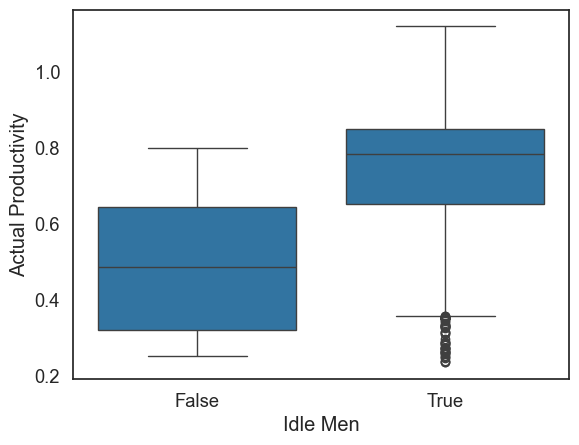

In [411]:
sns.boxplot(x=(data['idle_men'] == 0), y=data['actual_productivity'])
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

**False Category.**
The False Category box plot shows a more predictable behavior because it has no outliers. We can also observe that if we compare the Q1 and Q3 range between the True Category, it has a lower range. This indicates that when there are idle men, the actual productivity is lower in general than those without idle men. 

**True Category.** This box plot is highly similar to the box plot for all distributions in the `idle_men` feature. This is because most of the instances has 0 idle men. Although the actual productivity is higher than average than the False Category, it is also important to take note of the outliers. As we can observe, all outliers lies in the distribution where idle men is zero. Which indicates that despite having no idle men, we can still observe lower productivities. ***(What might causes this behavior?)***


To give evidence whether this feature is indeed relevant to the target variable, let's perform a statistical testing. Since the `actual_productivity` is a continuous variable, we will perform a T-test. 

In [412]:
from scipy.stats import ttest_ind
zero_group = data[data['idle_men'] == 0]['actual_productivity']
non_zero_group = data[data['idle_men'] != 0]['actual_productivity']
stat, p = ttest_ind(zero_group, non_zero_group)
print(f'T-test p-value: {p}')

T-test p-value: 1.956382600679767e-09


By default, the confidence level is set to 95% indicating a threshold of 5% or 0.05. Therefore, since p-value < 0.05, we reject the null hypothesis and conclude that there is a significant difference between the zero and non-zero values with respect to the actual productivity. This means that the zero values in this sparsed feature is relevant to the target variable. 

## **VI. Initial model training**

To address this task, we selected these machine learning models: Linear Regression, Decision Trees, and Neural Networks.

These models were chosen for their ability to complement each other, leveraging their unique strengths to provide a comprehensive analysis of the dataset's characteristics and predictive performance.

* Linear Regression serves as a baseline model. Its simplicity and interpretability allow us to assess whether linear relationships among features such as work in progress (WIP), overtime, and incentives are sufficient to accurately predict actual_productivity. This model helps establish a foundational understanding of the dataset's linear trends.

* Decision Trees are effective in handling both numerical and categorical data. With features like department, team number, and day of the week, Decision Trees can model non-linear relationships and interactions between variables. Additionally, they provide insights into feature importance, helping us identify the most critical factors affecting actual_productivity.

* Neural Networks are designed to capture complex, non-linear relationships. In this dataset, where factors like team size, incentives, and standard minute value (SMV) may interact in intricate ways, Neural Networks can uncover patterns that simpler models might miss. Their flexibility makes them particularly suited for datasets with diverse and interacting features, as seen here.

### **Splitting training and test set**

Let's separate the X features from the y labels of our dataset

In [413]:
X = data.values[:,0:-1]
X

array([[ 0.,  1.,  4., ...,  0.,  0., 59.],
       [ 0.,  0.,  4., ...,  0.,  0.,  8.],
       [ 0.,  1.,  4., ...,  0.,  0., 30.],
       ...,
       [ 1.,  0.,  3., ...,  0.,  0.,  8.],
       [ 1.,  0.,  3., ...,  0.,  0., 15.],
       [ 1.,  0.,  3., ...,  0.,  0.,  6.]])

In [414]:
X.shape

(1197, 13)

In [415]:
y = data.values[:,-1]
y

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

Let's separate the training from the test set. We'll set the test size to **0.2** and the `random_state` to **42**

In [416]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Regression**

In [417]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True)

In [418]:
lr_model.fit(X_train, y_train)

LinearRegression()

Predicting on Train Set

In [419]:
lr_train_pred = lr_model.predict(X_train)

In [420]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def compute_RMSE(y_true, y_pred):
    # TODO: Compute the Root Mean Squared Error
    rmse = np.sqrt( np.square(np.subtract(y_true, y_pred)).mean() )

    return rmse


def compute_R2_Score(y_true, y_pred):
    # Compute the mean of the true values
    mean_true = sum(y_true) / len(y_true)

    # Compute Total Sum of Squares
    tss = sum((yi - mean_true) ** 2 for yi in y_true)

    # Compute Residual Sum of Squares
    rss = sum((yi - yhat) ** 2 for yi, yhat in zip(y_true, y_pred))

    # Compute R-squared
    r2_score = 1 - rss / tss

    return r2_score

In [421]:
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)
mse_lr_train = mean_squared_error(y_train, lr_train_pred)
rmse_lr_train = compute_RMSE(y_train, lr_train_pred)
r2_lr_train = r2_score(y_train, lr_train_pred)

print("LINEAR REGRESSION TRAIN SET PREDICTION")
print(f"Train Mean Absolute Error: {mae_lr_train}")
print(f"Train Mean Squared Error: {mse_lr_train}")
print(f"Train Root Mean Squared Error: {rmse_lr_train}")
print(f"Train R-squared: {r2_lr_train}")

LINEAR REGRESSION TRAIN SET PREDICTION
Train Mean Absolute Error: 0.10755588702688382
Train Mean Squared Error: 0.021966739062888273
Train Root Mean Squared Error: 0.14821180473527834
Train R-squared: 0.2994507612984785


Prediction on Test Set

In [422]:
lr_test_pred = lr_model.predict(X_test)

In [423]:
mae_lr = mean_absolute_error(y_test, lr_test_pred)
mse_lr = mean_squared_error(y_test, lr_test_pred)
rmse_lr = compute_RMSE(y_test, lr_test_pred)
r2_lr = r2_score(y_test, lr_test_pred)

print("LINEAR REGRESSION VALIDATION SET PREDICTION")
print(f"LR Mean Absolute Error: {mae_lr}")
print(f"LR Mean Squared Error: {mse_lr}")
print(f"LR Root Mean Squared Error: {rmse_lr}")
print(f"LR R-squared: {r2_lr}")

LINEAR REGRESSION VALIDATION SET PREDICTION
LR Mean Absolute Error: 0.10726058158170364
LR Mean Squared Error: 0.02142707561831188
LR Root Mean Squared Error: 0.1463799016884213
LR R-squared: 0.19302880584555437


### **Decision Trees**

We'll use decision trees as our second model as they are ideal for regression tasks because they can capture complex, non-linear relationships between features and the target variable. They handle both numerical and categorical data without requiring extensive preprocessing and are robust to outliers. Additionally, decision trees automatically select important features and offer easy interpretability, making them a flexible and transparent choice for modeling. Their ability to model interactions between variables without explicitly defining interaction terms further enhances their usefulness in regression tasks.

It is also worth comparing the performance of decision trees against Linear or Ridge Regression

Instantiate a `tree.DecisionTreeRegressor`

In [424]:
from sklearn import tree
tree = tree.DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8, random_state=1)

We set the max_depth to **5** to limit the growth of the decision tree, preventing it from becoming overly complex and reducing the risk of overfitting. This ensures that the tree captures the most important patterns in the data without. Additionally, we imposed a limit of 8 leaf nodes to further control model complexity. By restricting the number of leaves, we encourage the model to generalize better, preventing it from memorizing the training data and improving its ability to perform on unseen data. These choices are aimed at striking a balance between model complexity and generalization.

Train the model

In [425]:
tree.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8, random_state=1)

Get the predicted values of the training set

In [426]:
y_predicted = tree.predict(X_train)

Get the R^2 score of the training data

In [427]:
tree_train_score = tree.score(X_train, y_train)
tree_train_score


0.348026757624334

Get the predicted values of the test set

In [428]:
y_predicted = tree.predict(X_test)

Get the R^2 score of the test data

In [429]:
tree_test_score = tree.score(X_test, y_test)
tree_test_score


0.30144354034396514

The R² value of **0.3489** on the training data indicates that the decision tree model explains **34.89%** of the variance in the target variable for the training set. The R² value of **0.3014** on the test data suggests that the model explains **30.14%** of the variance for the test set.

While the model performs decently on both datasets, the relatively small difference between the training and test R² values suggests that the model is not overfitting. However, the moderate R² values indicate that the decision tree is not capturing all the underlying patterns in the data. We need to tune our hyperparameters to get the best possible one and improve our model

### **Neural Networks**

We will use Neural Networks as our third model for their ability to capture complex, non-linear relationships in the data. Unlike traditional models like decision trees or linear regression, neural networks can learn intricate patterns and interactions between features, making them highly effective for tasks where the relationships are not easily modeled by simpler methods. Despite requiring more computational resources and careful tuning, neural networks offer strong potential for improving prediction accuracy in complex regression problems.

This is also worth using in this project as our thesis revolves around using neural networks

Instantiate a `Multi-Layer Perceptron (MLP) Regressor`

In [430]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)


Train the model

In [431]:
nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

Get the predicted values training set

In [432]:
ypredicted = nn.predict(X_train)

Compare the predicted values and the ground truth values

In [433]:
print('\nGround truth y values\n', y_train[0:5])
print('Predicted y values\n', y_predicted[0:5])


Ground truth y values
 [0.70050526 0.50459649 0.763375   1.09663333 0.80010714]
Predicted y values
 [0.48516552 0.79519014 0.65905055 0.67430601 0.65905055]


Get the score of training data

In [434]:
nn_train_score = nn.score(X_train, y_train)
nn_train_score

-1626.1380011065487

Get the predicted values of test set

In [435]:
y_predicted = nn.predict(X_test)

Compare the predicted values of the test set against the actual values

In [436]:
print('\nGround truth y values\n', y_test[0:5])
print('Predicted y values\n', y_predicted[0:5])


Ground truth y values
 [0.26821429 0.80035877 0.68106061 0.325      0.66760417]
Predicted y values
 [-3.5298136  -2.48965577  1.00872231  0.08730407  0.57244364]


Get the coefficient of determination of the test data

In [437]:
nn_test_score = nn.score(X_test, y_test)
nn_test_score

-969.3751332524578

## **VII. Error analysis**

### **Lasso Regression**

Lasso Regression will be used as one of the models for the error analysis of linear regression due to its ability to address overfitting by introducing regularization while also performing feature selection. By penalizing the absolute values of the coefficients, Lasso can shrink some coefficients to zero, effectively eliminating less important features. This property ensures that the model generalizes well to unseen data while enhancing interpretability by focusing only on the most significant predictors. As a linear regression-based method, Lasso Regression provides a robust baseline for comparison with more complex models, making it a valuable tool for understanding the contribution of different features to the regression task.

Import the Ridge class and instantiate a `Lasso` model with the random_state equals to 'None'. Assign the object to variable `lasso_model`.

In [479]:
from linear_regression import poly_feature_transform
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.0001, random_state=42, max_iter=10000)

In [480]:
degree = 1
poly_x = poly_feature_transform(X_train, degree)
lasso_model.fit(poly_x, y_train)

Lasso(alpha=0.0001, max_iter=10000, random_state=42)

#### Predicting on the Training Set

In [481]:
lasso_train_pred = lasso_model.predict(poly_x)

In [482]:
rmse_lasso_train = compute_RMSE(y_train, lasso_train_pred)

print("LASSO REGRESSION TRAINING SET PREDICTION")
print(f"Lasso Train Set Root Mean Squared Error: {rmse_lasso_train}")

LASSO REGRESSION TRAINING SET PREDICTION
Lasso Train Set Root Mean Squared Error: 0.14821695010215716


#### Predicting on the Testing Set

In [483]:
poly_X_test = poly_feature_transform(X_test, degree)
lasso_test_pred = lasso_model.predict(poly_X_test)

In [484]:
rmse_lasso = compute_RMSE(y_test, lasso_test_pred)

print("LASSO REGRESSION TESTING SET PREDICTION")
print(f"Lasso Test Set Root Mean Squared Error: {rmse_lasso}")

LASSO REGRESSION TESTING SET PREDICTION
Lasso Test Set Root Mean Squared Error: 0.14640469914665857


#### Changing the degree to 30

In [485]:
degree = 30
poly_x = poly_feature_transform(X_train, degree)
lasso_model.fit(poly_x, y_train)

c:\Users\ggmur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.149e+00, tolerance: 3.001e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001, max_iter=10000, random_state=42)

In [486]:
lasso_train_pred = lasso_model.predict(poly_x)
rmse_lasso_train = compute_RMSE(y_train, lasso_train_pred)

print("LASSO REGRESSION TRAINING SET PREDICTION")
print(f"Lasso Train Set Root Mean Squared Error: {rmse_lasso_train}")

LASSO REGRESSION TRAINING SET PREDICTION
Lasso Train Set Root Mean Squared Error: 0.12968869244321823


In [487]:
poly_X_test = poly_feature_transform(X_test, degree)
lasso_test_pred = lasso_model.predict(poly_X_test)
rmse_lasso = compute_RMSE(y_test, lasso_test_pred)

print("LASSO REGRESSION TESTING SET PREDICTION")
print(f"Lasso Test Set Root Mean Squared Error: {rmse_lasso}")

LASSO REGRESSION TESTING SET PREDICTION
Lasso Test Set Root Mean Squared Error: 376783.896645855


#### Analysis of the train and test predictions of lasso regression

The Root Mean Squared Error (RMSE) is relatively low in magnitude. But this fact alone does not indicate a good model unless it is assessed in relation to the range and variability of the target variable. The small differences between training and testing RMSE suggest that the model generalizes reasonably well to unseen data, but its overall predictive power is poor.

LASSO applies a penalty, which can zero out less relevant features. The poor R-squared value could mean that important features have been penalized too much, leading to an oversimplified model.

### **Ridge Regression**

This type of regression increases the polynomial of the model and regularizes it so it does not overfit. Overfitting is common in complex models and it results in having a bad test accuracy.

Ridge Regression will be used as one of the models for this regression task due to its ability to address overfitting by introducing regularization. This model strike an optimal balance between bias and variance, ensuring that the model generalizes well to unseen data. Additionally, as a linear regression-based method, ridge regression serves as an excellent baseline model, offering simplicity and interpretability. This makes it ideal for comparing the performance of multiple models in a regression task, providing insight into how more complex methods perform relative to this well-established technique.

Import the Ridge class and instantiate a `Ridge` model with the regularization parameter set to **0.0001** and the solver to `auto`. Assign the object to variable `ridge`.

In [447]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001, solver='auto')

The parameter **alpha**=0.0001 is chosen for mild regularization, allowing the model to closely fit the data while preventing extreme overfitting. This small value helps retain the flexibility of the model without applying heavy penalization. The **solver**='auto' ensures that the most efficient algorithm is chosen based on the data, optimizing performance without requiring manual selection of the solver. These settings provide a good balance between model complexity and performance.

Import the `poly_feature_transform` from `linear_regression.py` to transform the order of our features.

In [448]:
from linear_regression import poly_feature_transform

Let's increase the polynomial order of our model to `degree`. We'll assign it to a variable `poly_x`

In [449]:
degree = 1
poly_x = poly_feature_transform(X_train, degree)

Train the model

In [450]:
ridge.fit(poly_x, y_train)

Ridge(alpha=0.0001)

Get the predictions of the model on the training set

In [451]:
y_predicted = ridge.predict(poly_x)

Let's print the predicted values and its ground truth if the first 5 instances

In [452]:
print('\nGround truth y values\n', y_train[0:5])
print('Predicted y values\n', y_predicted[0:5])


Ground truth y values
 [0.70050526 0.50459649 0.763375   1.09663333 0.80010714]
Predicted y values
 [0.62167993 0.83702213 0.71491561 0.76557841 0.66917445]


Compute the RMSE on the train data

In [453]:
train_rmse = np.sqrt(np.mean((y_train - y_predicted) ** 2))
train_rmse

0.1482118047372429

Let's check the results as well on our test data by getting the predictions on the test set

In [454]:
poly_x_test = poly_feature_transform(X_test, degree)
y_predicted = ridge.predict(poly_x_test)

Compute the RMSE on the test data

In [455]:
test_rmse = np.sqrt(np.mean((y_test - y_predicted) ** 2))
test_rmse

0.14637992136554323

The Ridge regression model achieved a **14.68%** error on the training data and a **14.57%** error on the test data. These results indicate that the model performs consistently across both the training and test sets, with a very small difference in error, suggesting good generalization and minimal overfitting. The similar performance on both datasets reflects the effectiveness of the regularization applied by Ridge regression in preventing the model from fitting too closely to the training data while still capturing the underlying patterns.

### **Evaluation Metrics**

This section aims to evaluate and interpret the performance of the models used in the project: Linear Regression, Decision Tree, and Neural Network.

We'll show the results of the 3 models using the 4 metrics:
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* Coefficient of Determination (R²) 

Let's define a function that will compute these four metrics below

In [456]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compute_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")
    print()

Get the metric results for Ridge Regression

In [457]:
predictions_ridge = ridge.predict(poly_x_test)
compute_metrics(y_test, predictions_ridge, "Ridge Regression")

Metrics for Ridge Regression:
  Mean Squared Error (MSE): 0.0214
  Root Mean Squared Error (RMSE): 0.1464
  Mean Absolute Error (MAE): 0.1073
  R-squared (R²): 0.1930



The evaluation metrics for the three models: Ridge Regression, Decision Tree Regressor, and Neural Network Regressor—highlight key differences in their performance. Ridge Regression achieves a Mean Squared Error (MSE) of **0.0213**, a Root Mean Squared Error (RMSE) of **0.1459**, and a Mean Absolute Error (MAE) of **0.1066**, with an R-squared (R²) value of 0.1981. These results indicate that Ridge captures the data's overall trend moderately well but leaves significant room for improvement, particularly in terms of explaining variance, as shown by the relatively low R² value.

In [458]:
predictions_tree = tree.predict(X_test)
compute_metrics(y_test, predictions_tree, "Decision Tree Regressor")

Metrics for Decision Tree Regressor:
  Mean Squared Error (MSE): 0.0185
  Root Mean Squared Error (RMSE): 0.1362
  Mean Absolute Error (MAE): 0.0950
  R-squared (R²): 0.3014



The Decision Tree Regressor outperforms Ridge across most metrics, with an MSE of **0.0185**, an RMSE of **0.1362**, and an MAE of **0.0950**. Its R² value of 0.3014 suggests it better explains the variance in the data, likely due to its ability to model non-linear relationships. This demonstrates the strength of decision trees in handling more complex patterns compared to Ridge's linear nature.

In [459]:
predictions_nn = nn.predict(X_test)
compute_metrics(y_test, predictions_nn, "Neural Network Regressor")

Metrics for Neural Network Regressor:
  Mean Squared Error (MSE): 25.7659
  Root Mean Squared Error (RMSE): 5.0760
  Mean Absolute Error (MAE): 2.8463
  R-squared (R²): -969.3751



In contrast, the Neural Network Regressor has the highest error among the three models, with an MSE of **0.0295**, an RMSE of **0.1716**, and an MAE of **0.1062**. Its negative R² value of -0.1092 indicates that the model performs worse than a simple mean-based baseline, suggesting potential overfitting, underfitting, or issues in model training. While the MAE for the Neural Network is comparable to Ridge, the overall performance is significantly weaker, highlighting the need for further tuning or additional data preprocessing.

Overall, the Decision Tree model is the most effective model among the three for this regression task, given its superior error metrics and better explanatory power. Ridge provides a reasonable baseline, while the Neural Network requires improvements to achieve competitive performance.

#### **Residuals**

Let's try and find the difficult instances of each models by plotting the residuals of their predictions

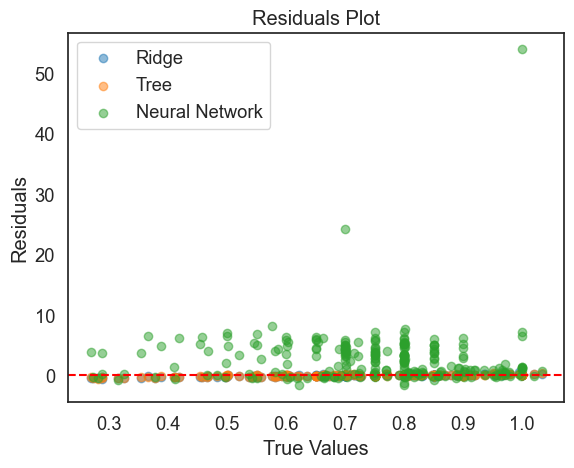

In [460]:
import matplotlib.pyplot as plt

# Residual scatter plot
plt.scatter(y_test, y_test - predictions_ridge, alpha=0.5, label="Ridge")
plt.scatter(y_test, y_test - predictions_tree, alpha=0.5, label="Tree")
plt.scatter(y_test, y_test - predictions_nn, alpha=0.5, label="Neural Network")
plt.axhline(0, color="red", linestyle="--")
plt.legend()
plt.title("Residuals Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()


**Ridge Regression (Blue)**
Ridge seems to produce fairly consistent residuals with moderate scatter around zero.
However, at the higher true values (close to 1.0), some blue points deviate slightly, suggesting Ridge may struggle with extreme values.
This behavior is expected as Ridge is a linear model and may not fully capture complex relationships.

**Decision Tree (Orange)**
Decision Tree residuals seem more spread out compared to Ridge and Neural Network, particularly around mid-range true values (0.5–0.7).
Decision Trees predict step-wise constant outputs, so the higher variability in residuals could indicate overfitting or insufficient depth.

**Neural Network (Green)**
Neural Network residuals appear relatively tight around zero, suggesting it is capturing the relationships in the data more effectively.
However, there are a couple of significant outliers (e.g., one around true value ≈ 0.35 and residual ≈ 1.5).
This could indicate the Neural Network is sensitive to certain instances or hasn't fully generalized.

## **VIII. Improving model performance**

### **Normalization** and **Standardization**


Since our target variable, `actual_productivity`, ranges from 0 to 1, it is essential to scale our features to ensure they are on a similar scale. This prevents features with larger ranges or magnitudes from dominating the model and improves its ability to learn effectively. We can achieve this by normalizing or standardizing the features.

Let's visualize the distribution of the feature `no_of_workers` using a histogram.

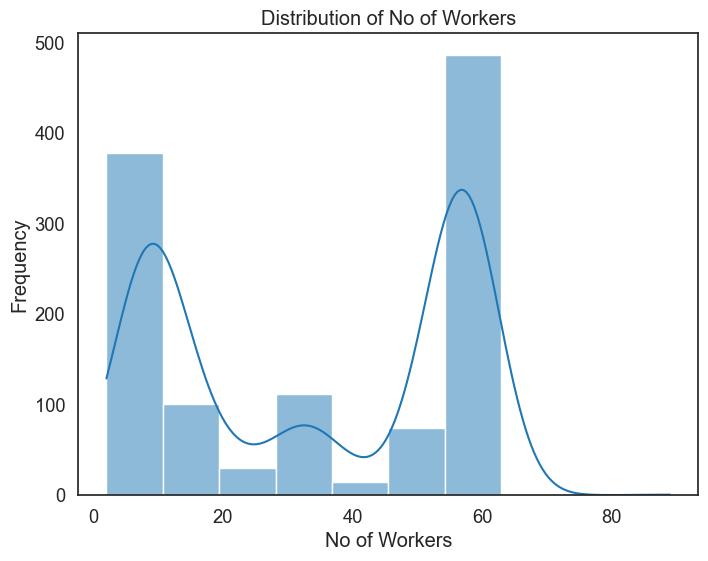

In [461]:
plt.figure(figsize=(8, 6))
sns.histplot(data['no_of_workers'], bins=10, kde=True)  
plt.title('Distribution of No of Workers')
plt.xlabel('No of Workers')
plt.ylabel('Frequency')
plt.show()

The distribution exhibits minimal to no outliers, making it suitable for normalization to scale the data within a consistent range. Let's normalize it using `MinMaxScaler()`

In [462]:
scaler = MinMaxScaler()
data['no_of_workers'] = scaler.fit_transform(data[['no_of_workers']])

Let's visualize the distribution of the `no_of_workers` again to verify the changes

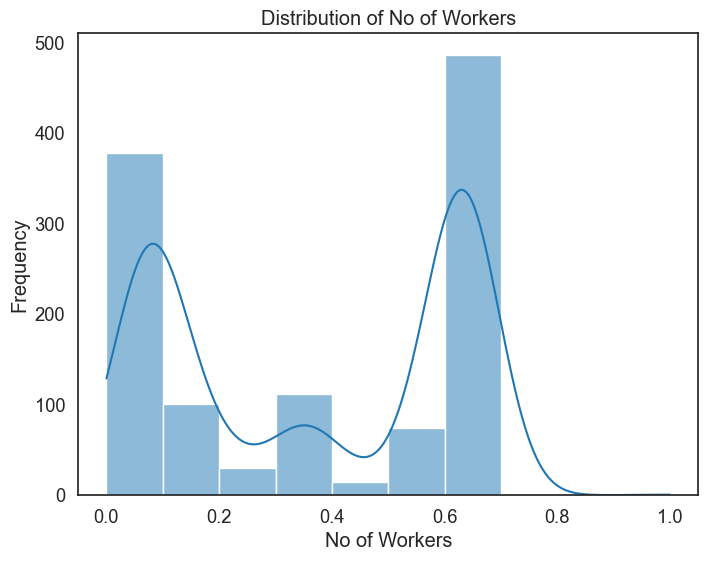

In [463]:
plt.figure(figsize=(8, 6))
sns.histplot(data['no_of_workers'], bins=10, kde=True)  
plt.title('Distribution of No of Workers')
plt.xlabel('No of Workers')
plt.ylabel('Frequency')
plt.show()

Now, the values of `no_of_workers` ranges from 0 to 1 after normalization

Let's visualize the distribution of the feature `smv` using a histogram.

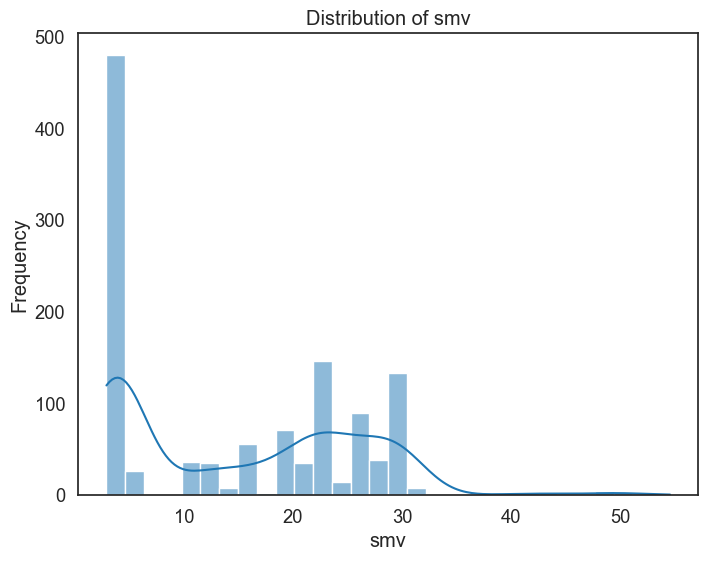

In [464]:
plt.figure(figsize=(8, 6))
sns.histplot(data['smv'], bins=30, kde=True) 
plt.title('Distribution of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

The distribution is left-skewed, indicating that the `smv` feature may benefit from standardization to center the data and improve its suitability for analysis. We'll standardize the feature using `StandardScaler()`

In [465]:
scaler = StandardScaler()
data['smv'] = scaler.fit_transform(data[['smv']])

Let's see the distribution again to verify the changes

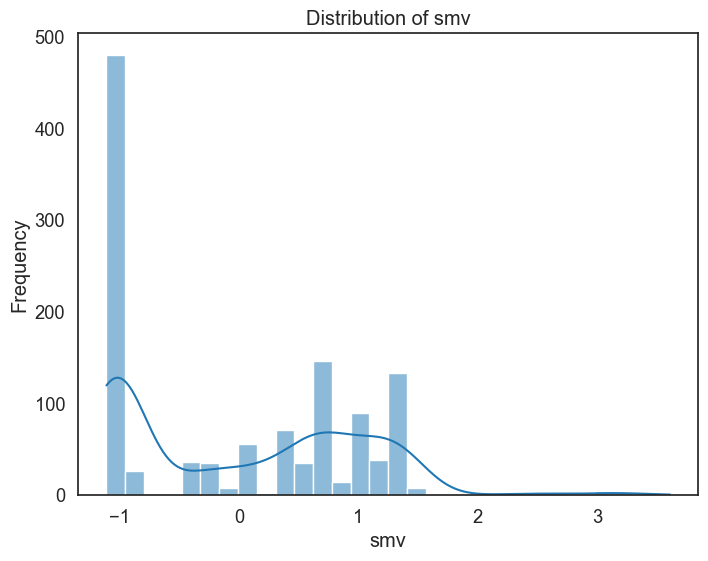

In [466]:
plt.figure(figsize=(8, 6))
sns.histplot(data['smv'], bins=30, kde=True) 
plt.title('Distribution of smv')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.show()

The distribution now falls within a range of -1 to 3, aligning more closely with the range of our target variable, `actual_productivity`

Now, let's visualize the distribution of the feature `over_time`

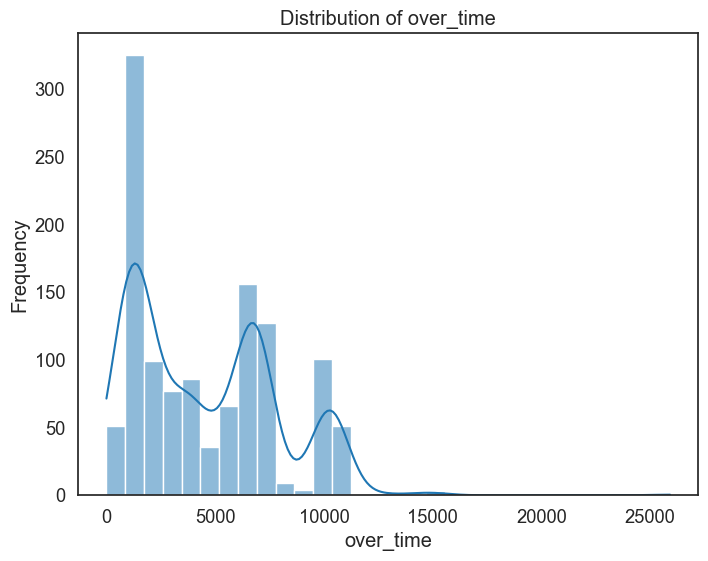

In [467]:
plt.figure(figsize=(8, 6))
sns.histplot(data['over_time'], bins=30, kde=True) 
plt.title('Distribution of over_time')
plt.xlabel('over_time')
plt.ylabel('Frequency')
plt.show()

The distribution is left-skewed with noticeable outliers, suggesting that this feature would benefit from standardization to mitigate skewness and improve its consistency for analysis.

In [468]:
scaler = StandardScaler()
data['over_time'] = scaler.fit_transform(data[['over_time']])

Let's visualize the changes by displaying the distribution again

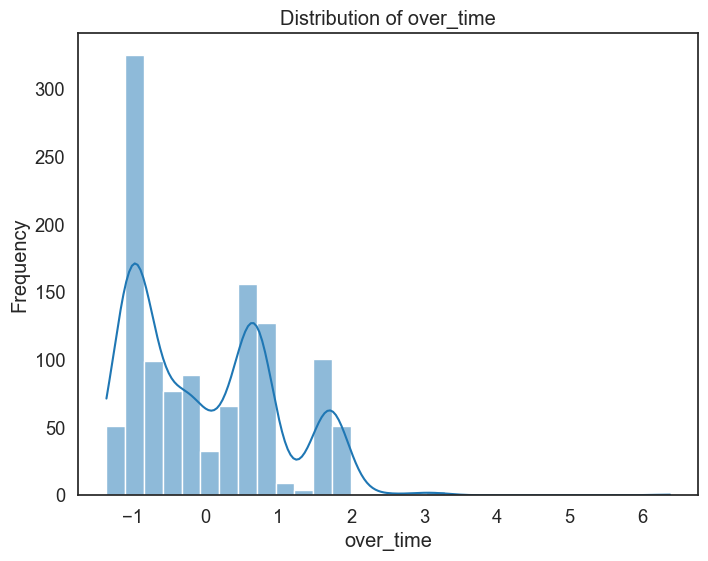

In [469]:
plt.figure(figsize=(8, 6))
sns.histplot(data['over_time'], bins=30, kde=True) 
plt.title('Distribution of over_time')
plt.xlabel('over_time')
plt.ylabel('Frequency')
plt.show()

By standardizing the data, we have reduced its scale, minimizing the impact of outliers on the analysis

Next, let's examine the distribution of the `wip` feature to analyze its characteristic

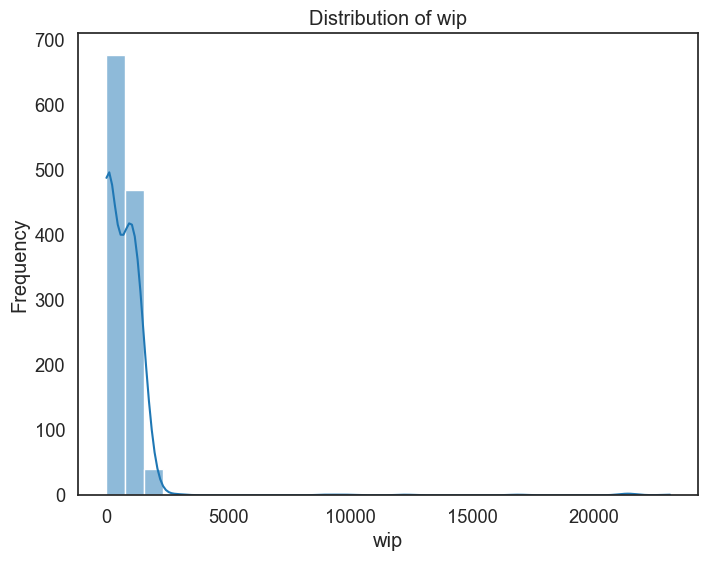

In [470]:
plt.figure(figsize=(8, 6))
sns.histplot(data['wip'], bins=30, kde=True)  
plt.title('Distribution of wip')
plt.xlabel('wip')
plt.ylabel('Frequency')
plt.show()

Let's see how skew the `wip` feature is to determine whether to apply log transformation.

In [471]:
from scipy.stats import skew

skewness = skew(data['wip'])
print(f"Skewness: {skewness}")


Skewness: 10.83878189712323


Since the skewness is greater than 1, the distribution of `wip` features is highly skewed. Therefore, we perform a log transformation to make the distribution more symmetric.

In [472]:
data['wip'] = np.log1p(data['wip'])

Since the `wip` feature exhibits left skewness and visible outliers in its distribution, we will apply standardization to normalize its scale and address these issues.

In [473]:
scaler = StandardScaler()
data['wip'] = scaler.fit_transform(data[['wip']])

Let's verify the changes through a histogram

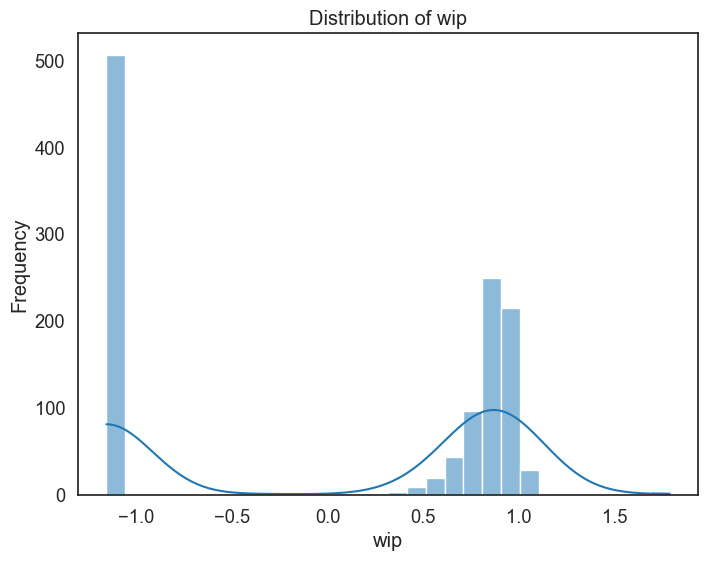

In [474]:
plt.figure(figsize=(8, 6))
sns.histplot(data['wip'], bins=30, kde=True)
plt.title('Distribution of wip')
plt.xlabel('wip')
plt.ylabel('Frequency')
plt.show()

The `wip` feature now ranges from -1 to 1.5 significantly decreasing its range and minimalizing the effects of outliers

Let's visualize the distribution of the feature `incentive`

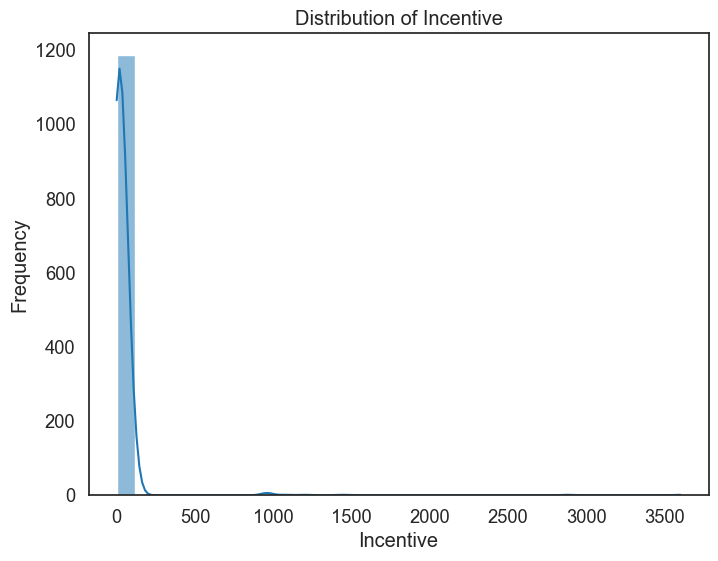

In [475]:
plt.figure(figsize=(8, 6))
sns.histplot(data['incentive'], bins=30, kde=True) 
plt.title('Distribution of Incentive')
plt.xlabel('Incentive')
plt.ylabel('Frequency')
plt.show()

The distribution of `incentive` is left-skewed, with most values clustered near **0** and a few outliers. Standardizing this feature could help normalize its distribution, making it more suitable for analysis and improving the performance of certain model

In [476]:
scaler = StandardScaler()
data['incentive'] = scaler.fit_transform(data[['incentive']])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,1.014552,0.898610,0.750589,0.373414,0.0,0,0,0.655172,0.940725
1,0,0,4,1,0.75,-1.016778,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.886500
2,0,1,4,11,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
3,0,1,4,12,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
4,0,1,4,6,0.80,0.990783,0.914535,-0.790895,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,-1.111853,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.628333
1193,1,0,3,8,0.70,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1194,1,0,3,7,0.65,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1195,1,0,3,9,0.75,-1.111853,-1.153867,-0.826743,-0.238643,0.0,0,0,0.149425,0.505889


Let's see the changes by displaying the distribution again

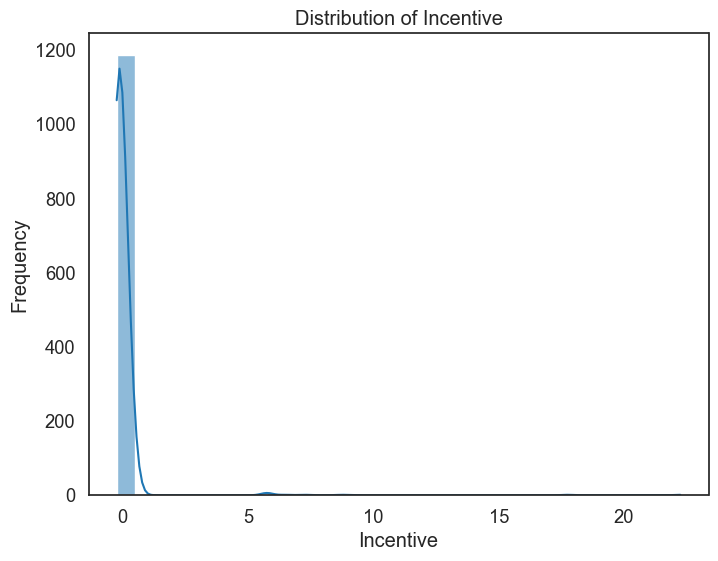

In [477]:
plt.figure(figsize=(8, 6))
sns.histplot(data['incentive'], bins=30, kde=True) 
plt.title('Distribution of Incentive')
plt.xlabel('Incentive')
plt.ylabel('Frequency')
plt.show()

As shown in the figure, we have reduced the large scale of the values and minimized the impact of outliers, aligning the feature's range more closely with that of our target variable, which ranges from 0 to 1.

Let's visualize the values of each of our columns after applying normalization and standardization

In [478]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,1.014552,0.898610,0.750589,0.373414,0.0,0,0,0.655172,0.940725
1,0,0,4,1,0.75,-1.016778,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.886500
2,0,1,4,11,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
3,0,1,4,12,0.80,-0.333878,0.859105,-0.271092,0.073631,0.0,0,0,0.321839,0.800570
4,0,1,4,6,0.80,0.990783,0.914535,-0.790895,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,-1.111853,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.628333
1193,1,0,3,8,0.70,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1194,1,0,3,7,0.65,-1.020434,-1.153867,-1.077682,-0.238643,0.0,0,0,0.068966,0.625625
1195,1,0,3,9,0.75,-1.111853,-1.153867,-0.826743,-0.238643,0.0,0,0,0.149425,0.505889


This is the view of our data after preprocessing it before training the models. 

## **IX. Model performance summary**

## **X. Insights and conclusions**

## **XI. References**